<a href="https://colab.research.google.com/github/anishdass/MachineLearningWithTheSameOldDataset/blob/master/insights_from_sales_datset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import plotly.graph_objs as go
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [5]:
weather = pd.read_csv('Summary of Weather.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.



In [6]:
weather.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

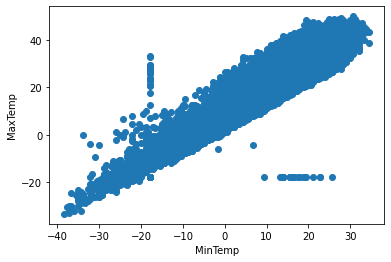

In [8]:
plt.scatter(weather.MinTemp, weather.MaxTemp)
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [9]:
X = weather.MinTemp.values.reshape(-1, 1)
y = weather.MaxTemp.values.reshape(-1, 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train) #Training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print(model.intercept_) #For retreiving the intercept
print(model.coef_) #For retreiving the slope

[10.66185201]
[[0.92033997]]


In [13]:
y_pred = model.predict(X_test)

-38.33333333
34.44444444


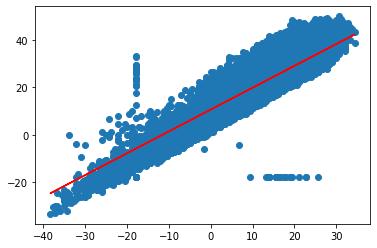

In [14]:
m = 0.92033997

c = 10.66185201

plt.scatter(X, y)

print(X.min())
print(X.max())

b = m*X + c
plt.plot(X, b, color = 'red')

plt.show()

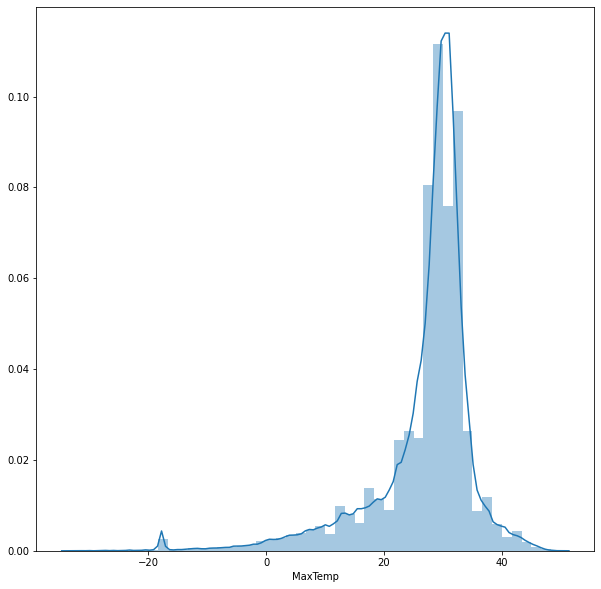

In [15]:
plt.figure(figsize = (10, 10))
seabornInstance.distplot(weather.MaxTemp)

In [16]:
print('Mean absolute error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean squared error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean absolute error:  3.19932917837853
Mean squared error:  17.631568097568447
Root Mean squared error:  4.198996082109204


In [17]:
wine = pd.read_csv('winequality-red.csv')

In [18]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [20]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
wine.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [22]:
X = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

y = wine['quality'].values

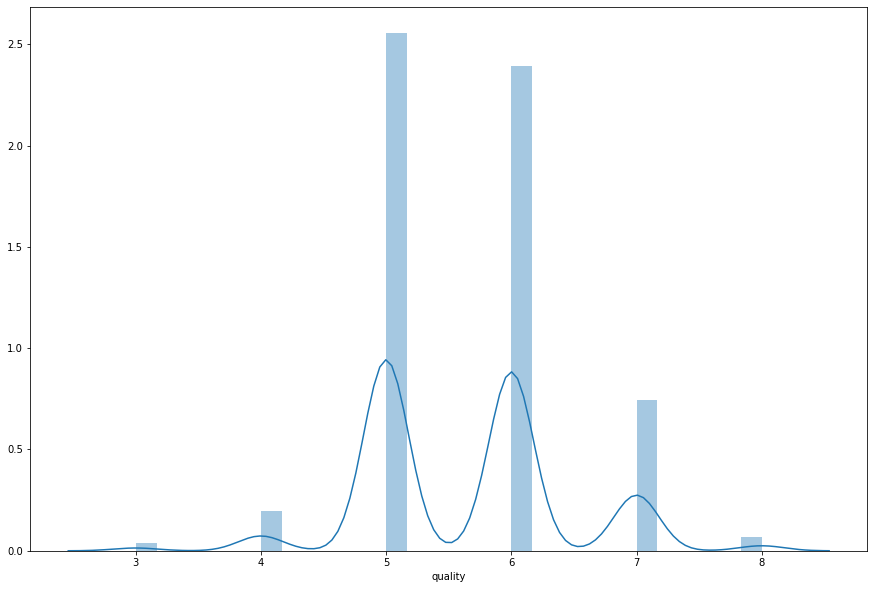

In [23]:
plt.figure(figsize = (15, 10))
plt.tight_layout
seabornInstance.distplot(wine.quality)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
model.intercept_

34.99871062872145

In [27]:
model.coef_

array([ 4.12835075e-02, -1.14952802e+00, -1.77927063e-01,  2.78700036e-02,
       -1.87340739e+00,  2.68362616e-03, -2.77748370e-03, -3.15166657e+01,
       -2.54486051e-01,  9.24040106e-01,  2.67797417e-01])

In [28]:
coeff_diff=pd.DataFrame(model.coef_,wine.columns[:-1])
coeff_diff

,0
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


In [29]:
y_pred = model.predict(X_test)

In [30]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df1 = df.head(25)

In [31]:
df1

,Actual,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676


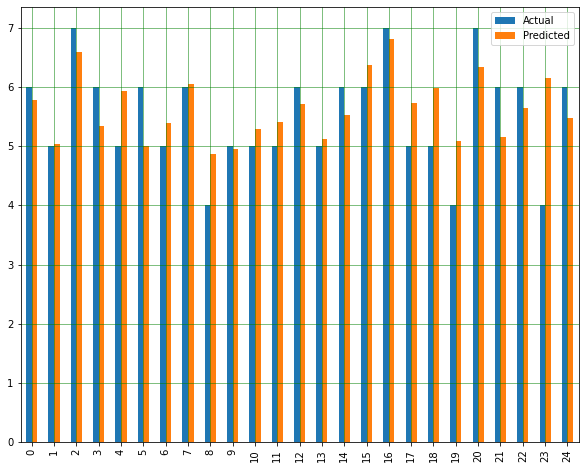

In [32]:
df1.plot(kind = 'bar', figsize = (10, 8))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

In [33]:
print('Mean absolute error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean squared error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean absolute error:  0.46963309286611105
Mean squared error:  0.3844711978201246
Root Mean squared error:  0.620057414938427


In [34]:
bar1 = go.Bar(
              x= df1.index, \
              y= df['Actual'], \
              name = 'Actual', \
              marker = dict(color = 'rgba(255, 99, 71, 0.75)', line = dict(color = 'rgb(0,0,0)'))
              )


bar2 = go.Bar(
              x= df1.index,\
              y= df['Predicted'],\
              name = 'Predicted',\
              marker = dict(color = 'rgba(192, 192, 192, 0.75)', line = dict(color = 'rgb(0,0,0)'))
              )

data= [bar1, bar2]

layout = go.Layout(template= "plotly_dark", title= 'Actual vs Predicted Wine Quality', yaxis = dict(title = 'Quality'))

fig = go.Figure(data = data, layout = layout)
fig.show()

In [35]:
wine['quality'].mean()*.10

0.5636022514071295

In [36]:
sales = pd.read_csv('sales.csv')

In [37]:
sales.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,source,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,train,14,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,train,4,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,train,14,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,train,15,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,train,26,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [38]:
sales.columns

Index(['Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Type',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year', 'source',
       'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9'],
      dtype='object')

In [39]:
sales.drop(columns= ['source', 'Item_Type', 'Outlet_Establishment_Year'], axis = 1, inplace = True)

In [40]:
sales.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,14,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,4,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,14,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.000000,19.20,15,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.000000,8.93,26,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [41]:
sales.shape

(8523, 32)

In [42]:
X = sales.iloc[:200, 4:5].values
y = sales.iloc[:200, 2].values
#X = np.sort(X, axis = 0)

In [43]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
print(model.coef_)
print(model.intercept_)

[21.96212259]
1916.8136781255132


In [45]:
poly = PolynomialFeatures(degree = 15) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

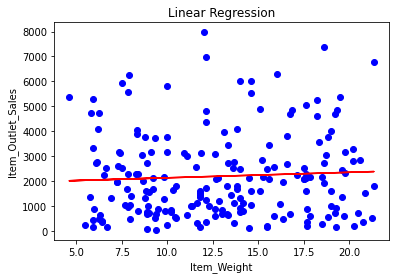

In [46]:
# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, model.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Item_Weight') 
plt.ylabel('Item_Outlet_Sales') 
  
plt.show()

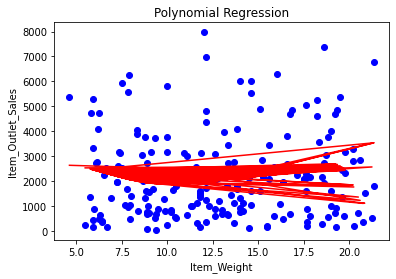

In [47]:
# Visualising the Polynomial Regression results

plt.scatter(X, y, color ='blue')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color ='red')
plt.title('Polynomial Regression')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

In [48]:
print(model.predict([[5.75]]))

[2043.09588302]


In [49]:
lin2.predict(poly.fit_transform([[5.75]]))

array([2487.19010031])

In [50]:
model_coef = model.coef_
lin2_coef = lin2.coef_

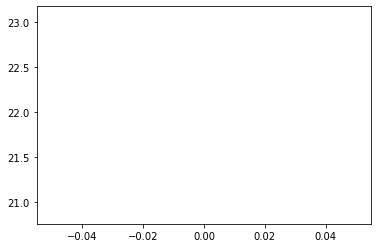

In [51]:
plt.plot(model_coef )
plt.show()

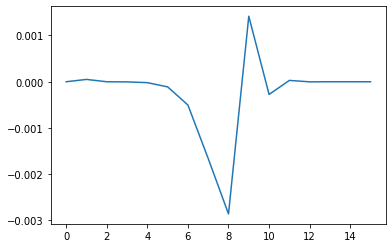

In [52]:
plt.plot(lin2_coef)

plt.show()

In [53]:
X1 = sales.loc[:, ['Item_Weight', 'Item_MRP', 'Item_Visibility']]

In [54]:
X1.head()

,Item_Weight,Item_MRP,Item_Visibility
0,9.30,249.8092,0.016047
1,5.92,48.2692,0.019278
2,17.50,141.6180,0.016760
3,19.20,182.0950,0.000000
4,8.93,53.8614,0.000000


In [55]:
X_train1, X_cv1, y_train1, y_cv1 = train_test_split(X1, sales.Item_Outlet_Sales.values, test_size=0.3, random_state =43)

In [64]:
# Intiating baseline model
alg1 = LinearRegression(normalize=True)
alg1.fit(X_train1, y_train1)

# Predicting on the sample subset 
yhat1 = alg1.predict(X_cv1)

# Calculating error

print('Mean Squared Error is',metrics.mean_squared_error(y_cv1, yhat1))

# R-Square

alg1_r2_score = metrics.r2_score(y_cv1, yhat1)

print('R Square Score is ', alg1_r2_score)

Mean Squared Error is 1949472.2441449491
R Square Score is  0.3372350701376967


In [65]:
# Let's try out to set up a baseline model with just two explanatory variables
X2 = sales.drop(columns=['Item_Outlet_Sales','Item_Identifier'],axis = 1)

x_train2, x_cv2, y_train2, y_cv2 = train_test_split(X2, sales.Item_Outlet_Sales, test_size =0.3, random_state =100)

# Intiating baseline model
alg2 = LinearRegression(normalize=True)
alg2.fit(x_train2, y_train2)

# Predicting on the sample subset 
yhat2 = alg2.predict(x_cv2)

# Calculating error

print('Mean Squared Error is',metrics.mean_squared_error(y_cv2, yhat2))

alg2_r2_score = metrics.r2_score(y_cv2, yhat2)

print('R Square Score is ', alg2_r2_score)

Mean Squared Error is 1271195.0738208126
R Square Score is  0.5518454653275329


In [66]:
X3 = sales.drop(columns=['Item_Outlet_Sales','Item_Identifier', 'Item_Visibility', 'Outlet_Years'],axis=1)
x_train3, x_cv3, y_train3, y_cv3 = train_test_split(X3, sales.Item_Outlet_Sales, test_size =0.3, random_state =100)

# Intiating baseline model
alg3 = LinearRegression(normalize=True)
alg3.fit(x_train3, y_train3)

# Predicting on the sample subset 
yhat3 = alg3.predict(x_cv3)

# Calculating error

print('Mean Squared Error is',metrics.mean_squared_error(y_cv3, yhat3))

alg3_r2_score = metrics.r2_score(y_cv3, yhat3)

print('R Square Score is ', alg3_r2_score)

Mean Squared Error is 1271085.9100657874
R Square Score is  0.5518839505552088


In [60]:
def adj_r2_score(model1, y, yhat):
  adj = 1 - float(len(y)-1)/(len(y) - len(model.coef_)-1)*(1 - metrics.r2_score(y, yhat))
  return adj

adj_score_model1 = adj_r2_score(alg1, y_cv1, yhat1)
adj_score_model2 = adj_r2_score(alg2, y_cv2, yhat2)
adj_score_model3 = adj_r2_score(alg3, y_cv3, yhat3)

In [67]:
print('R square {} and adjusted Rsquare {} of model 1:'.format(alg1_r2_score, adj_score_model1))
print('R square {} and adjusted Rsquare {} of model 2:'.format(alg2_r2_score, adj_score_model2))
print('R square {} and adjusted Rsquare {} of model 3:'.format(alg3_r2_score, adj_score_model3))

R square 0.3372350701376967 and adjusted Rsquare 0.3369756709479267 of model 1:
R square 0.5518454653275329 and adjusted Rsquare 0.5516700623785417 of model 2:
R square 0.5518839505552088 and adjusted Rsquare 0.551708562668929 of model 3:


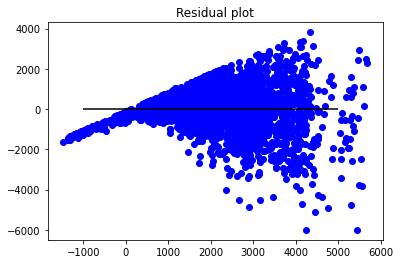

In [68]:
# Lets plot residuals of model 2 

x_plot = plt.scatter(yhat2, (yhat2 - y_cv2), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')
plt.show()

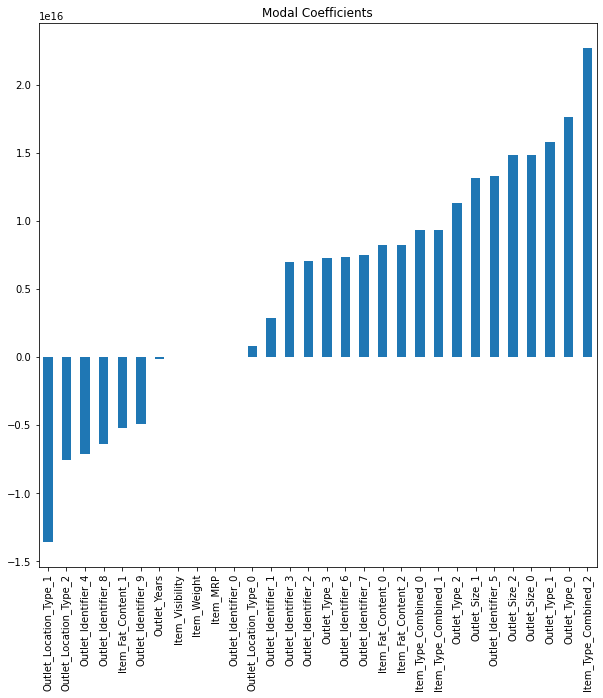

In [63]:
predictors = x_train2.columns

coef = pd.Series(alg2.coef_,predictors).sort_values()

plt.figure(figsize=(10,10))
coef.plot(kind='bar', title='Modal Coefficients')
plt.show()